<a href="https://colab.research.google.com/github/Venu-Kelzarkar/ML_linear_model/blob/main/linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
data = pd.read_csv("/content/50_Startups.csv")
data = data.drop(["Administration","Marketing_Spend"], axis = 1)
data.head()

,RnD_Spend,State,Profit
0,165349.20,New York,192261.83
1,162597.70,California,191792.06
2,153441.51,Florida,191050.39
3,144372.41,New York,182901.99
4,142107.34,Florida,166187.94


In [ ]:
X = data["RnD_Spend"]
y = data["Profit"]

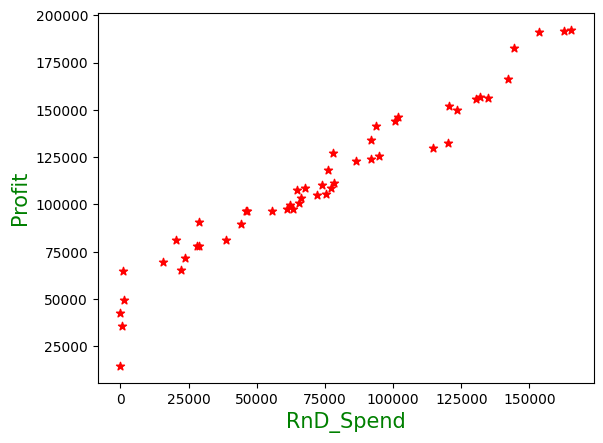

In [ ]:
plt.xlabel("RnD_Spend", color="green",size=15)
plt.ylabel("Profit", color="green",size=15)
plt.scatter(X,y, color="red",marker="*")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=23)
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
X_train.flatten()

array([142107.34,  23640.93, 130298.13, 162597.7 ,      0.  ,  27892.92,
         1000.23, 114523.61,   1315.46,  78013.11,  46426.07,  44069.95,
       165349.2 , 131876.9 ,  78389.47, 100671.96, 153441.51,  15505.73,
       134615.46,  64664.71,  75328.87,  38558.51,  72107.6 ,  93863.75,
        61136.38,      0.  , 123334.88,  28754.33,  20229.59,  86419.7 ])

In [ ]:
## standardizing the dataset
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.flatten()

array([ 1.31756868, -0.96989188,  1.08954538,  1.71321577, -1.42637313,
       -0.88779047, -1.40705975,  0.78495615, -1.40097299,  0.07997717,
       -0.52993502, -0.5754292 ,  1.76634431,  1.12002975,  0.08724428,
        0.5174955 ,  1.53641946, -1.12697395,  1.17290843, -0.17776626,
        0.02814735, -0.68184925, -0.03405196,  0.38603619, -0.24589456,
       -1.42637313,  0.95509241, -0.87115755, -1.03576123,  0.24229949])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# y = m*x + c
# coefficient -> slope
m = lr.coef_
print(m)
# intercept
c = lr.intercept_
print(c)

[0.84940184]
49595.18541923223


In [ ]:
# predict y
y_pred_train = lr.predict(X_train)
print(y_pred_train)

[170301.42150149  69675.834862   160270.65679782 187705.97098901
  49595.18541923  73287.48299192  50444.78262172 146871.75048373
  50712.53956376 115859.66460216  89029.57470406  87028.28204065
 190043.10015194 161611.66694085 116179.34547868 135106.13348584
 179928.68635506  62765.78101273 163937.80484397 104521.50908028
 113579.66620699  82346.85476327 110843.51354166 129323.22738431
 101524.53908594  49595.18541923 154356.05943501  74019.16623097
  66778.23638892 123000.2376168 ]


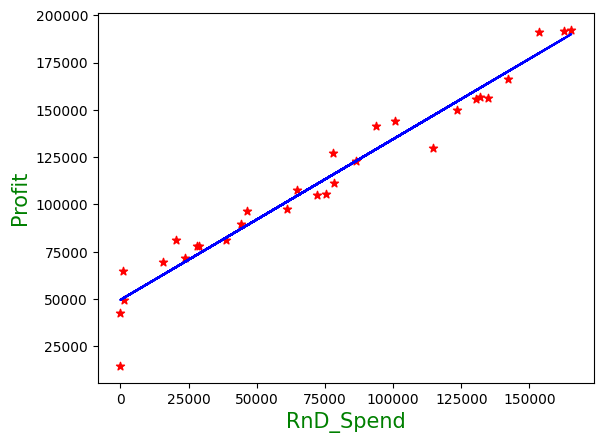

In [ ]:
plt.xlabel("RnD_Spend", color="green",size=15)
plt.ylabel("Profit", color="green",size=15)
plt.scatter(X_train, y_train, color="red", marker="*")
plt.plot(X_train, y_pred_train, color="blue")

In [ ]:
# predict y
y_pred_test = lr.predict(X_test)
print(y_pred_test)

[151475.19417818 127527.09074734 129997.15129824 103454.78777944
 127733.69075689  96731.84866152 114365.35441503 151984.22371289
  73942.23590632 105699.4680461  105320.60084936 136160.34309758
  68432.99858364 172225.37612736 112446.30083778  50055.60368664
 102253.41080489  88679.57867586 115036.50927896 106957.44066525]


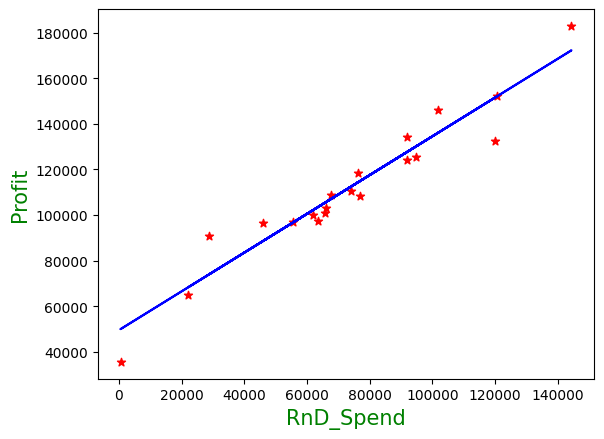

In [ ]:
plt.xlabel("RnD_Spend", color="green",size=15)
plt.ylabel("Profit", color="green",size=15)
plt.scatter(X_test, y_test, color="red", marker="*")
plt.plot(X_test, y_pred_test, color="blue")

In [ ]:
y_pred_train = lr.predict([[142107.34]])
print(y_pred_train)

[170301.42150149]


In [ ]:
## cross validation
from sklearn.model_selection import cross_val_score
mse = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
np.mean(mse)

-116169426.35267739

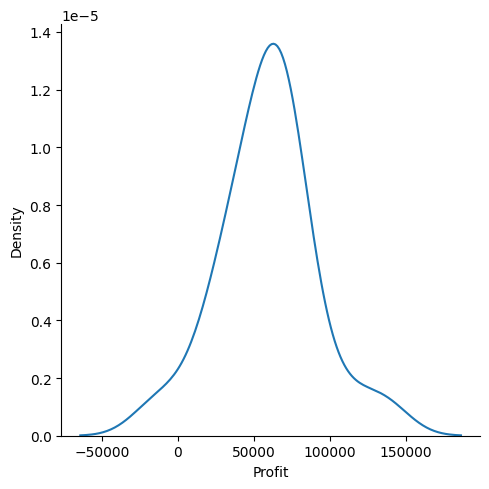

In [ ]:
import seaborn as sns
sns.displot(y_pred_train - y_test, kind = "kde")